<a href="https://colab.research.google.com/github/subhashsomarouthu/Yes_Bank_Stock_Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

The objective of this project is to analyze the impact of a fraud case involving Rana Kapoor on the stock prices of Yes Bank, a prominent bank in the Indian financial domain. The dataset used in this project consisted of monthly stock prices of Yes Bank since its inception, including closing, starting, highest, and lowest stock prices.

To predict the stock's closing price, I developed three models namely Ridge_regression, Random Forest and XGBoost Regressor model was developed. The model was trained using the historical stock price data and various features such as mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns in the data.The performance of the model was evaluated using metrics like RMSE (Root Mean Squared Error),adjustes R2 and R2 score. xGBoost regressor performed well among the three with high R2 score and adjusted R2.

The analysis aimed to uncover any patterns or changes in stock prices related to the fraud case involving Rana Kapoor. The feature importance provided by the XGBoost model helped identify the key factors influencing the stock price.


Overall, the project aimed to contribute to a better understanding of the relationship between the fraud case and Yes Bank's stock prices, and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock.

# **GitHub Link -**

https://github.com/subhashsomarouthu/Yes_Bank_Stock_Closing_Price_Prediction

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

**Business Objective.**

The ultimate business objective is to leverage the regression model to provide accurate predictions of the closing price of Yes Bank stock, enabling stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, Early warning systems to alert any fraud cases like Rana Kapoor and align investment strategies with financial goals.

Steps involved are:-

1.DATA PREPROCESSING

2.DATA CLEANING

3.DATA DUPLICATION

4.HANDLING OUTLIERS

5.FEATURE TRANSFORMATION

6.EXPLORATORY DATA ANALYSIS

7.ENCODING OF CATEGORICAL COLUMNS

8.ALGORITHMS:-

a.Linear Regression
b.Ridge Regression
c.Random Forest Regressor
d.XGBoost Regressor


# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset

#from google.colab import files
#file=files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Data_Science_almabetter/capstone_project_module1/data_YesBank_StockPrices.csv')

In [ ]:
#import io
#dataset = pd.read_csv(io.BytesIO(file['data_YesBank_StockPrices.csv']))


### Dataset First View

In [ ]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape



(185, 5)

In [ ]:
dataset.size

925

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

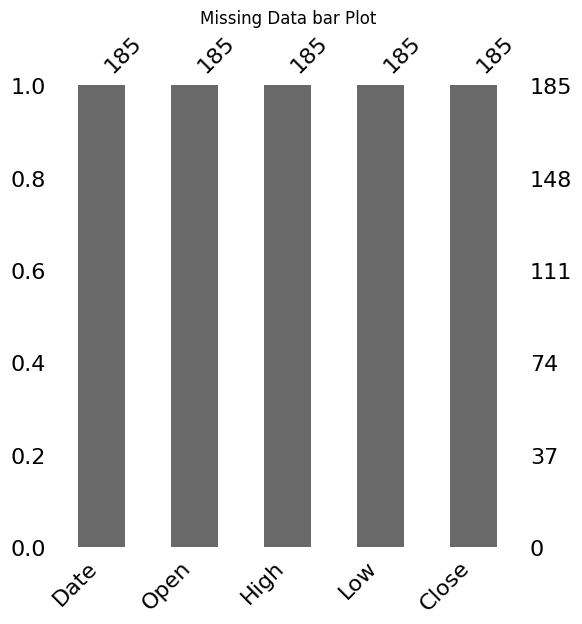

In [ ]:
# Visualizing the missing values
import missingno as msno


msno.bar(dataset,figsize=(6,6))


plt.title('Missing Data bar Plot')
plt.show()



### What did you know about your dataset?

There are 5 columns and 185 records in the given dataset.It includes monthly stock prices from July 2005 to November 2020. Among the 5 columns, 4 are independent variables (Date, open,high,low) and dependent variable(close). There are no duplicate values, null values or missing values in the data. All the independent variables are of float data type except date which is object and need to be converted to datetime.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Date - Date of the record. It has monthly dates from July 2005 to November
2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('unique values in ',i, 'are', dataset[i].nunique())


unique values in  Date are 185
unique values in  Open are 183
unique values in  High are 184
unique values in  Low are 183
unique values in  Close are 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
dataset_copy= dataset.copy()

In [ ]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset_copy.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
len(dataset_copy[dataset_copy.duplicated()])

0

In [ ]:
#converting datatype of Date from string to Datetime

from datetime import datetime

dataset_copy['Date']=pd.to_datetime(dataset_copy['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
dataset_copy.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
col=dataset_copy.columns.to_list()
numerical_cols=col[1:]

In [ ]:
numerical_cols

['Open', 'High', 'Low', 'Close']

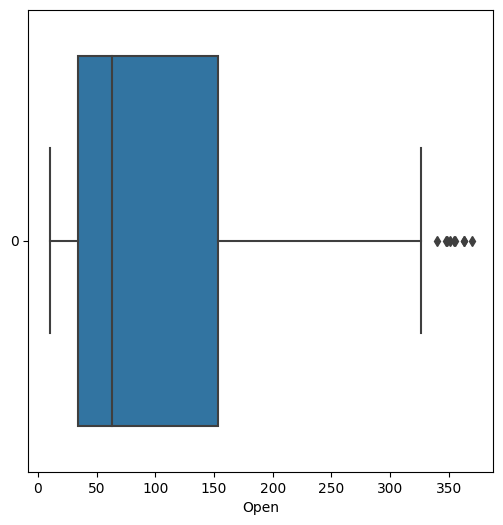

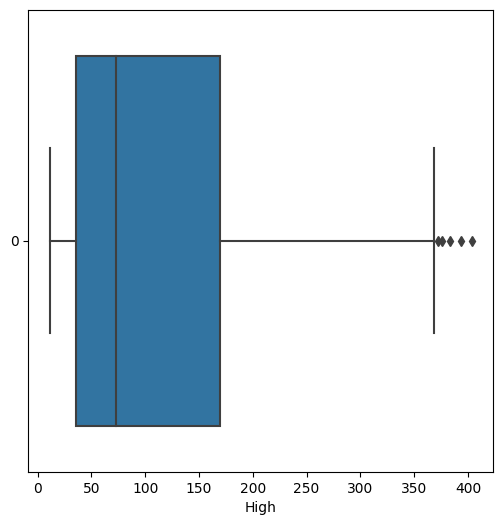

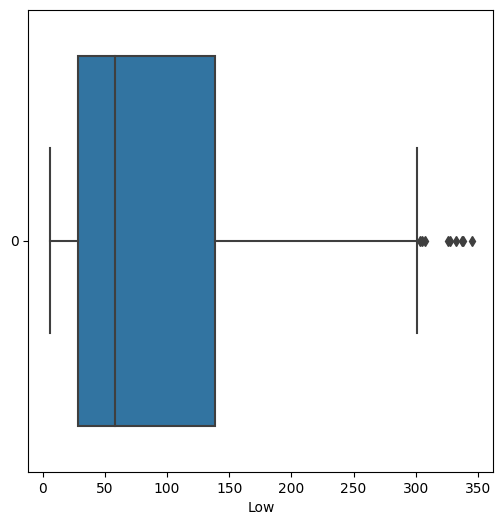

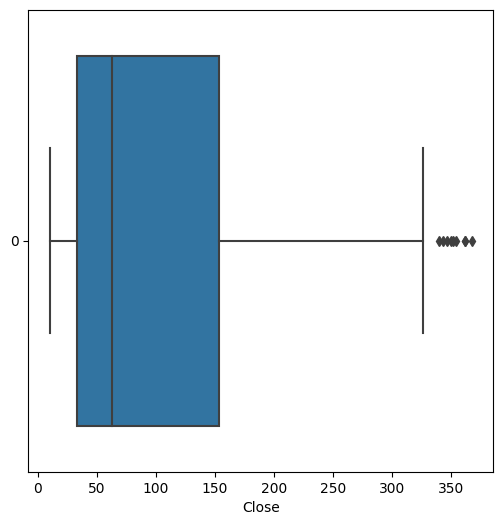

In [ ]:
for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(dataset_copy[column],orient='h')
  plt.xlabel(column, fontsize=10)
  plt.show()

In [ ]:
#setting the Date as index.
dataset_copy.set_index('Date', inplace=True)

In [ ]:
dataset_copy.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# seperating the data
independent_variables = dataset_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

I have changed datatype of Date variable to datetime. Remaining all variables are numerical. numerical variables are Open,High, Low and Close(dependent variable). There are no null values and duplicate values.  Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

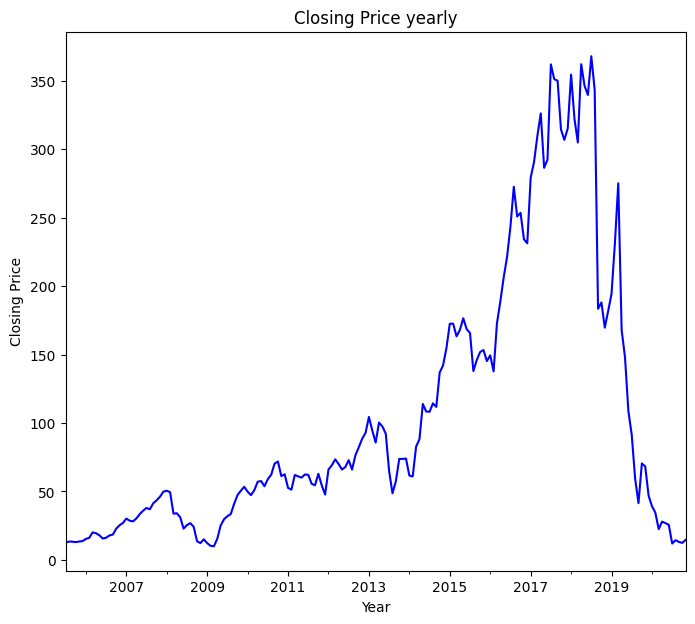

In [ ]:
plt.figure(figsize=(8,7))
dataset_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

To see how closing price in each year.

##### 2. What is/are the insight(s) found from the chart?

form seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018  fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 2

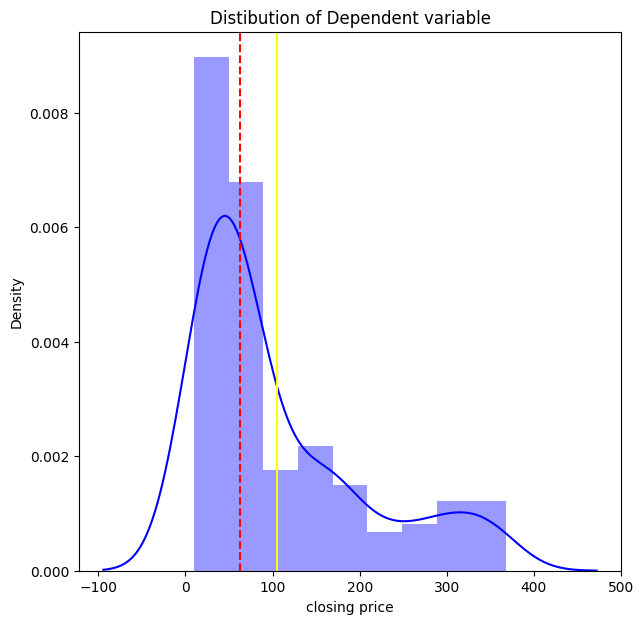

In [ ]:
# Dependent variable 'Close'
#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(dataset_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(dataset_copy['Close'].mean(),color='yellow')
plt.axvline(dataset_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price.

#### Chart - 3

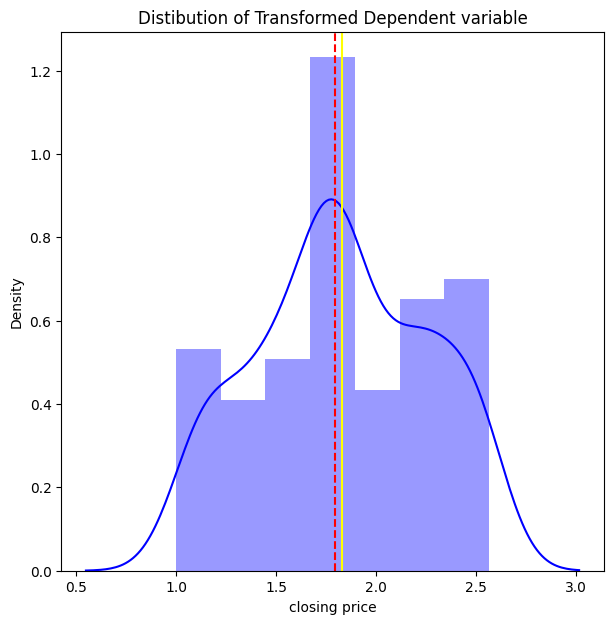

In [ ]:
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(dataset_copy['Close']).mean(),color='yellow')
plt.axvline(np.log10(dataset_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

to see the distribution of y variable

##### 2. What is/are the insight(s) found from the chart?

After the log transformation it nearly looks like normal distribution.
mean and median are almost same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the data is normally distributed, it becomes easy to develop a good model

#### Chart - 4

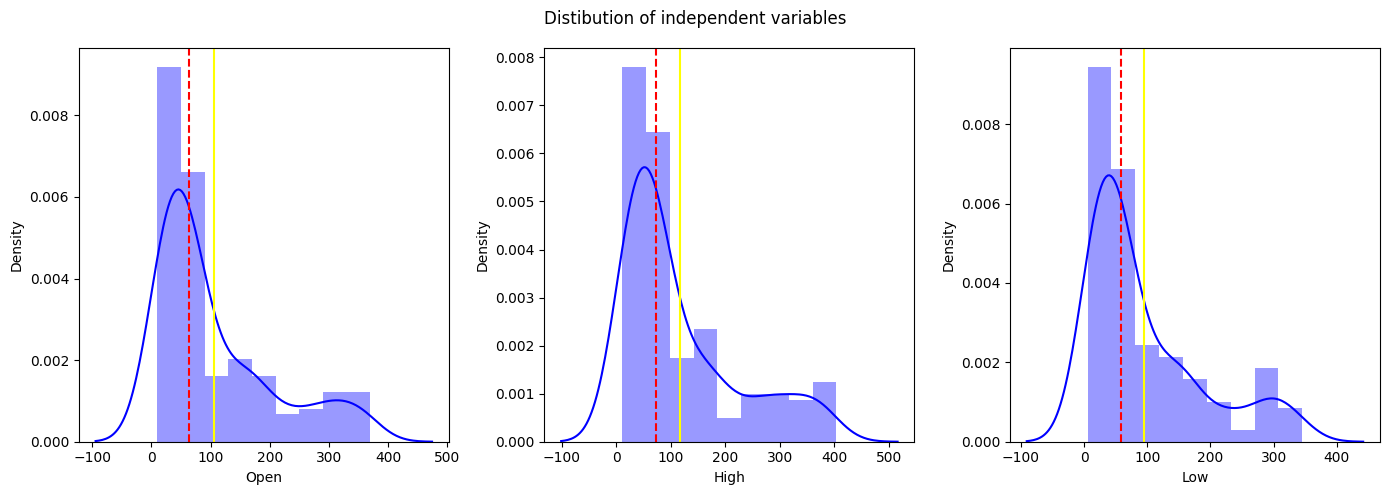

In [ ]:

# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(dataset_copy[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(dataset_copy[col].mean(), color='yellow')
    plt.axvline(dataset_copy[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 5

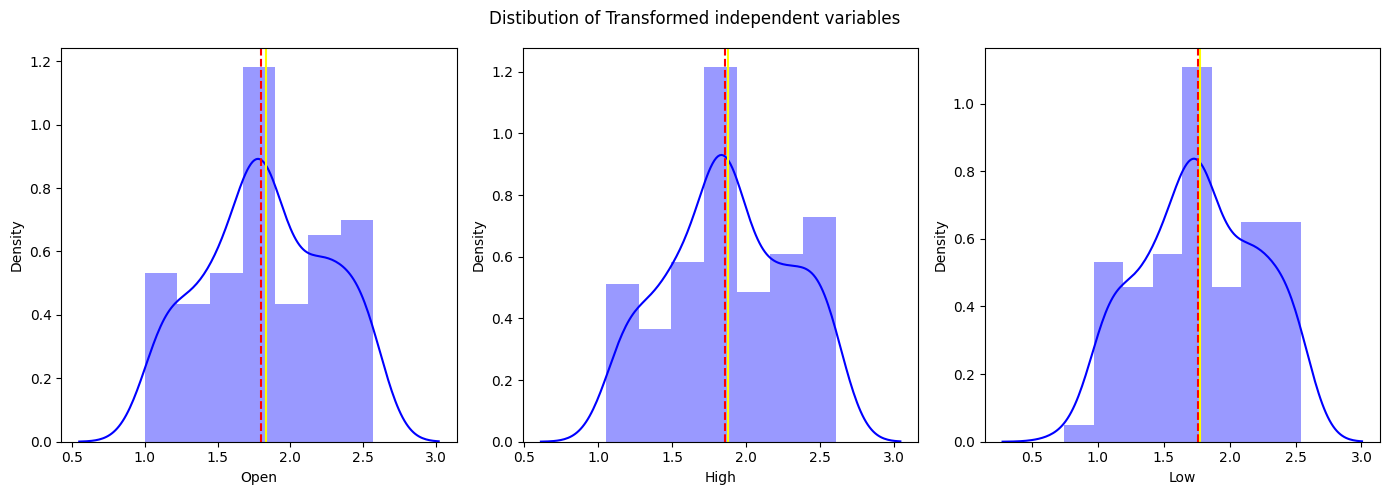

In [ ]:
# Distribution of transformed independent variables
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(np.log10(dataset_copy[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(dataset_copy[col]).mean(), color='yellow')
    plt.axvline(np.log10(dataset_copy[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables after transformation applied.

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

#### Chart - 6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.9 MB/s eta 0:00:00


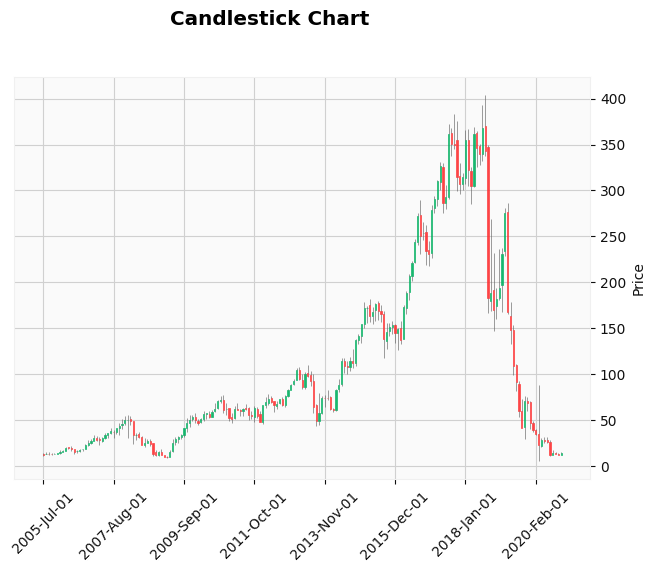

In [ ]:
!pip install mplfinance

import mplfinance as mpf

df_candle = dataset_copy[['Open', 'High', 'Low', 'Close']]

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

##### 1. Why did you pick the specific chart?

candle sticks are most widely used finance world. with this chart I wnat to see how variables are each month.

##### 2. What is/are the insight(s) found from the chart?

from the above chart, there is no much deviation from the price shown by open, high, low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 7

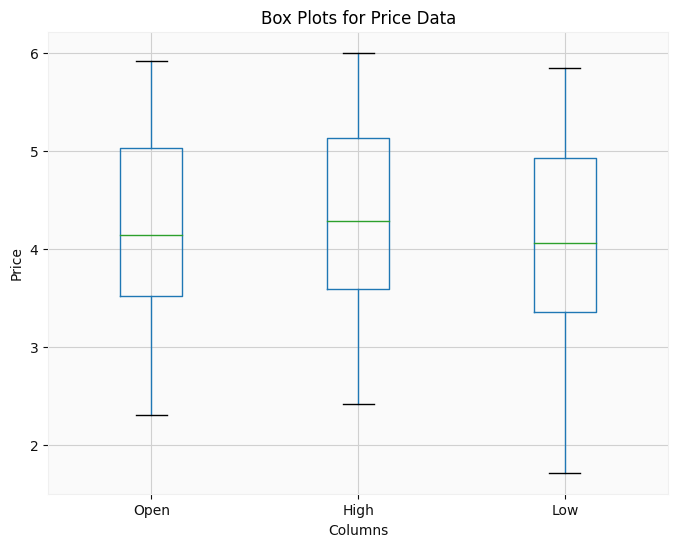

In [ ]:
df_price = np.log(dataset_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

TO see outliers exists or not in the independent variables.

##### 2. What is/are the insight(s) found from the chart?

After transformation applied, outliers appeared to be diminished.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps us building a good model, however given the dataset that small, it is also not advisable to completely remove outliers.

#### Chart - 8

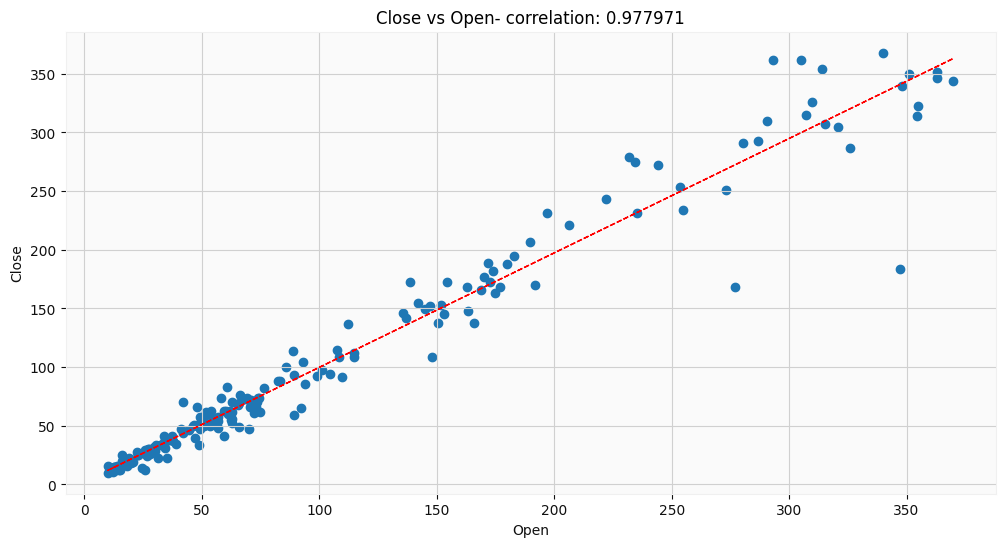

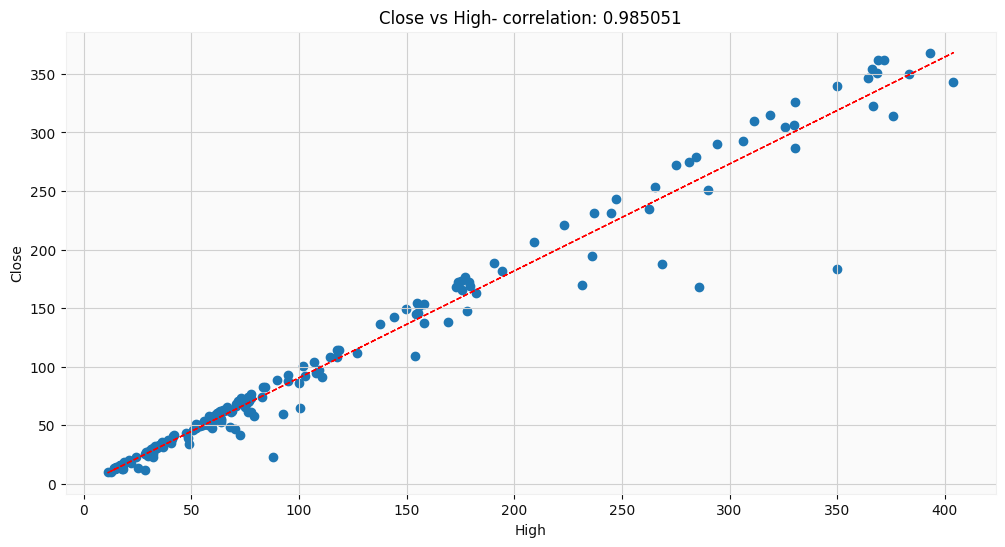

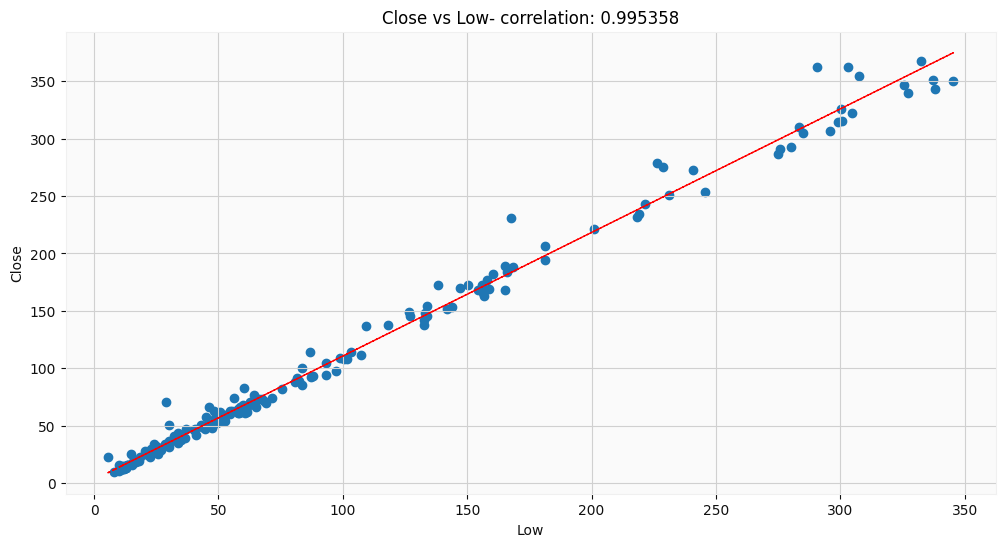

In [ ]:
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = dataset_copy[col]
  label = dataset_copy['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(dataset_copy[col], dataset_copy['Close'], 1)
  y_ = np.poly1d(z)(dataset_copy[col])

  plt.plot(dataset_copy[col], y_, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

I want to plot correlation between independent variable and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

It seems that all independent variables are highly correlated and linear in fashion to dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

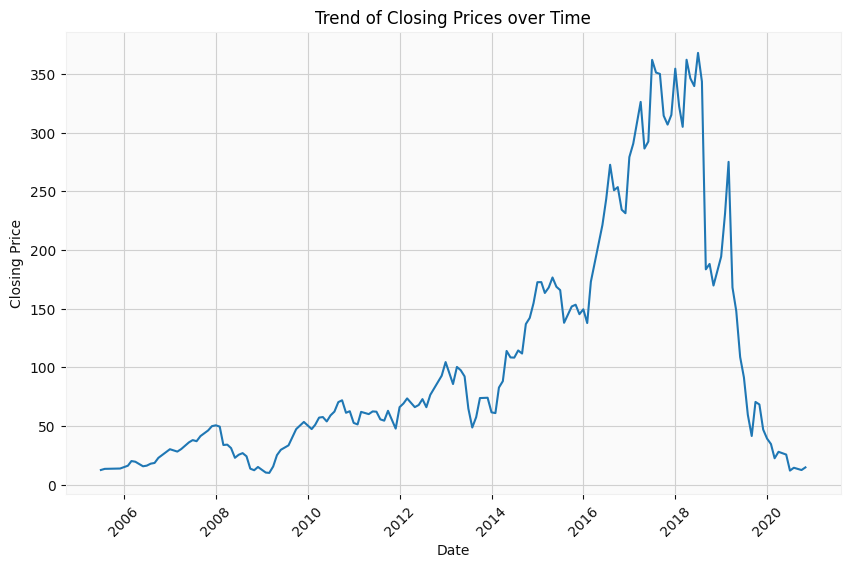

In [ ]:


# Extract the date and closing price columns from the dataset
dates = dataset_copy.index
closing_prices = dataset_copy['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Chart - 10 - Correlation Heatmap

<Axes: >

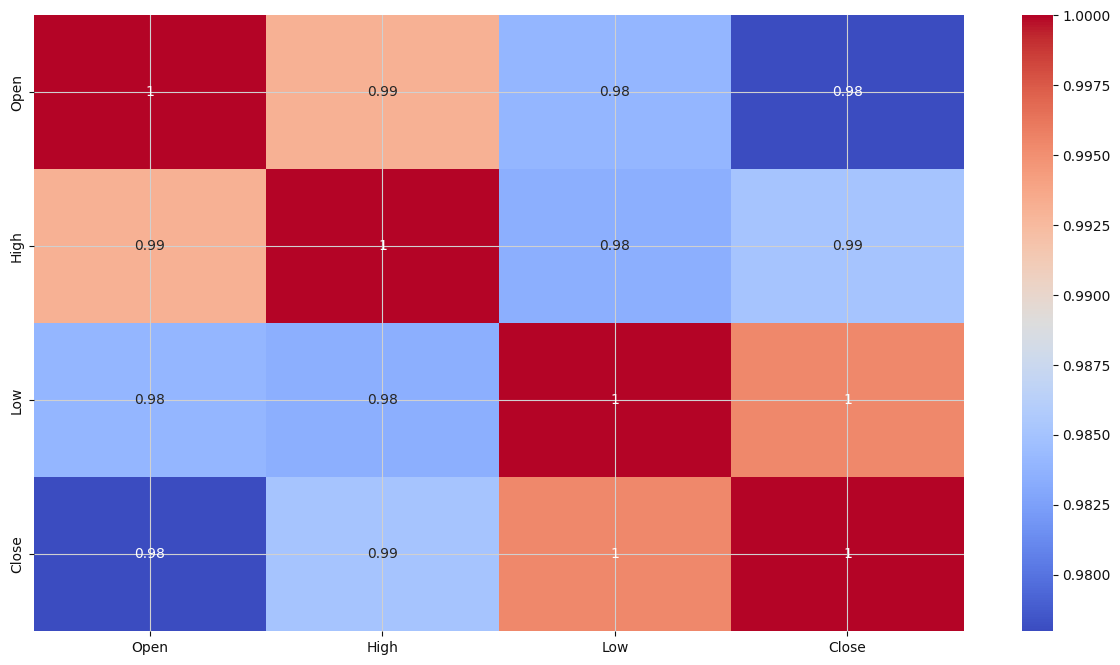

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation = dataset_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.

#### Chart - 11 - Pair Plot

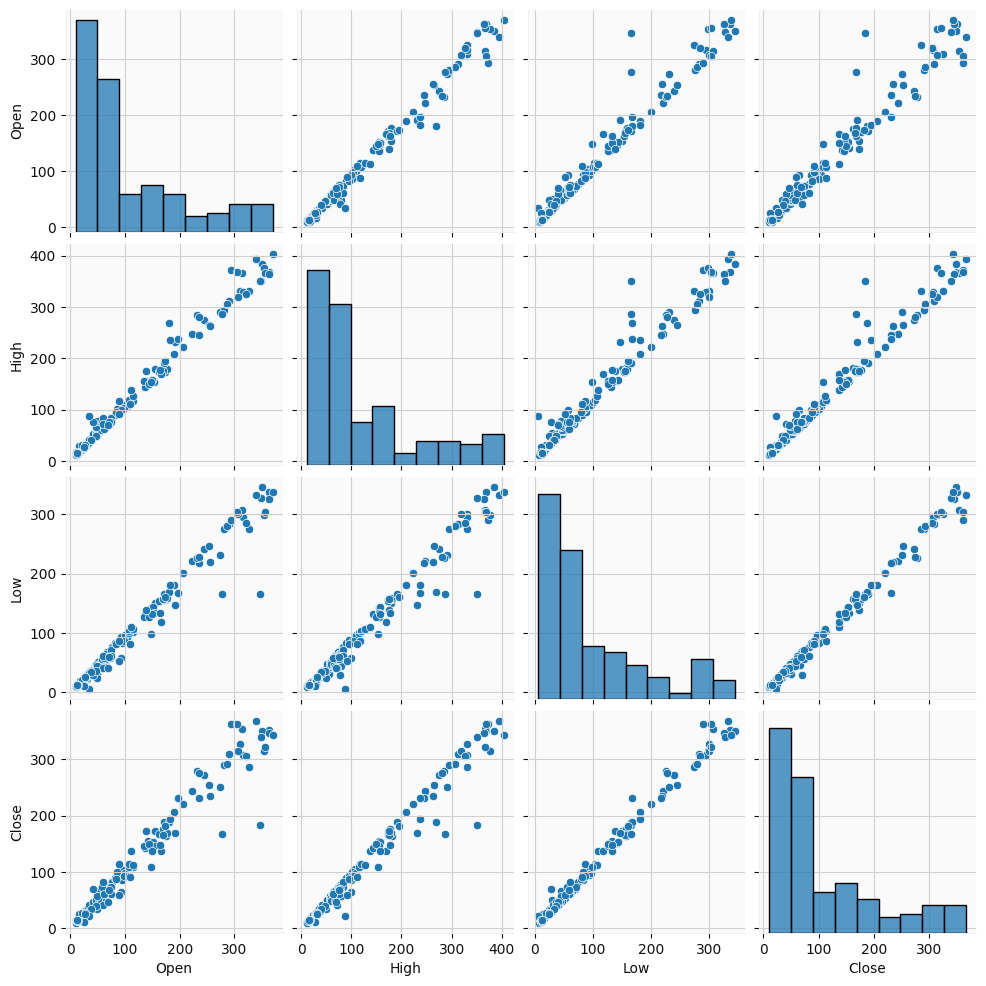

In [ ]:
# Pair Plot visualization code

sns.pairplot(dataset_copy)

In [ ]:
dataset_copy

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [ ]:
ds1=dataset_copy.copy()

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement1: There is a significant difference in the mean closing prices between the first half (2005-2017) and the second half (2018-2020) of the dataset.

Statement2: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = ds1['Close'][ds1.index.year <= 2017]
second_half = ds1['Close'][ds1.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

Z test, as i my data has more than 30 records.

##### Why did you choose the specific statistical test?

my dataset has more than 30 records, and i can calculate mean and sd from it.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices.
Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices..

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Calculate the mean opening and closing prices for each month
ds1['Month'] = ds1.index.strftime('%Y-%m')
monthly_data = ds1.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")




Reject the null hypothesis. There is a significant difference in the mean closing prices.


In [ ]:
from scipy import stats

# Divide the data into groups based on opening prices
high_opening_prices = ds1[ds1['Open'] > threshold]['Close']
low_opening_prices = ds1[ds1['Open'] <= threshold]['Close']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(high_opening_prices, low_opening_prices)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")


Reject the null hypothesis. There is a significant difference in the mean closing prices.


##### Which statistical test have you done to obtain P-Value?

t test and z test.

##### Why did you choose the specific statistical test?

as my data is sample data and not normally distrubuted. there is skewenss involved.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#There are no missing values in the dataset.

dataset_copy.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

### 2. Handling Outliers

In [ ]:

#Transformation has taken care of outliers, so no need to treat outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#There are no categorical variables in this dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


dataset_copy['Mean_OHL'] = dataset_copy[['Open', 'High', 'Low']].mean(axis=1)
dataset_copy.head()



,Open,High,Low,Close,Mean_OHL
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000
2005-08-01,12.58,14.88,12.55,13.42,13.336667
2005-09-01,13.48,14.87,12.27,13.30,13.540000
2005-10-01,13.20,14.47,12.40,12.99,13.356667
2005-11-01,13.35,13.88,12.88,13.41,13.370000


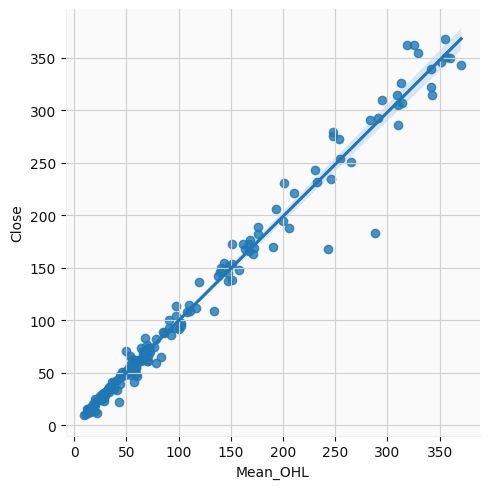

In [ ]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='Mean_OHL', y='Close', fit_reg=True, data=dataset_copy)

<Axes: xlabel='Mean_OHL', ylabel='Density'>

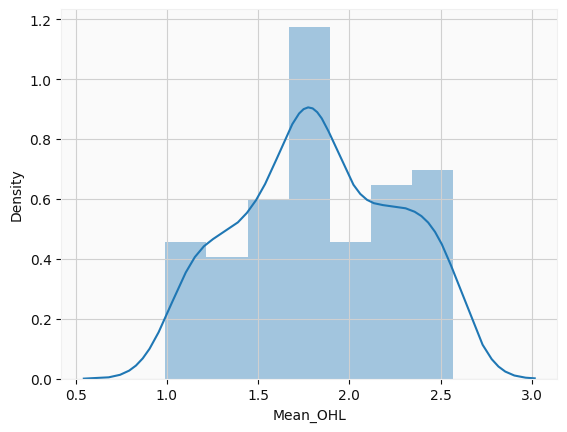

In [ ]:
x=np.log10(dataset_copy['Mean_OHL'])
sns.distplot(x)

In [ ]:
# use lags as additional features
for i in range(1, 13):
    dataset_copy["lag_{}".format(i)] = dataset_copy.Mean_OHL.shift(i)

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor


#def calc_vif2(X):

    # Calculating VIF
    #vif = pd.DataFrame()
    #vif["variables"] = X.columns
    #vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    #return(vif)

#calc_vif2(dataset_copy[[i for i in dataset_copy.describe().columns if i not in ['Close']]])

Now, I am using only Mean_OHL column and lag values, which will take the previous month OHL value. It will be useful to cover underlying patterns in this kind of problem.

In [ ]:
dataset_copy.head()

,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,12.58,14.88,12.55,13.42,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,13.48,14.87,12.27,13.30,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.20,14.47,12.40,12.99,13.356667,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.35,13.88,12.88,13.41,13.370000,13.356667,13.540000,13.336667,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Feature Selection

In [ ]:
#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = dataset_copy.dropna().Close.values
x_independ = dataset_copy.dropna().drop(['Close','Open','High','Low'], axis=1)



In [ ]:
dependent_variable

['Close']

##### Which all features you found important and why?

Open,High, close. I think they must be included because, on opening price is high and when low, there is a significant change in closing price.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,independent variables and dependent variables have skeweness. I have used log transformation as the skewness is small.

In [ ]:
x_independ.head()

,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
2006-07-01,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667,12.750000
2006-08-01,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667
2006-09-01,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000
2006-10-01,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667
2006-11-01,24.223333,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000


In [ ]:
# Transform Your data

x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values



array([[ 1.19516137, 16.66666667, 19.13333333, ..., 13.54      ,
        13.33666667, 12.75      ],
       [ 1.22358246, 15.67333333, 16.66666667, ..., 13.35666667,
        13.54      , 13.33666667],
       [ 1.25269125, 16.73333333, 15.67333333, ..., 13.37      ,
        13.35666667, 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.66666667, ..., 68.76666667,
        49.23333333, 57.66666667],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.76666667, 49.23333333],
       [ 1.11969568, 13.14      , 14.13      , ..., 43.98333333,
        60.4       , 68.76666667]])

In [ ]:
#without transformation
#X_not =

# Create the dependent variable data
#Y_not = np.log10(y_depend)


### 6. Data Scaling

In [ ]:
# Scaling your data

#after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)





In [ ]:
#without transformation
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
I am going to use standard scaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As I have only few features, dimensionality reduction is not necessary

Price Range: Instead of using Open, High, and Low separately, you can calculate the price range as the difference between the High and Low prices. This variable represents the volatility or fluctuation in the stock price for each period and can provide additional information to the model.

Average Price: Another approach is to calculate the average price as the average of the Open, High, and Low prices. This variable represents the overall price level for each period and can be useful in capturing the general trend or level of the stock price.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

#splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(138, 13)
(35, 13)


In [ ]:
#without transformation
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)
#print(X_train.shape)
#print(X_test.shape)

##### What data splitting ratio have you used and why?

I have used 80 percent of the data for training the model and 20 % for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

I do not think the data is imbalanced.

## ***7. ML Model Implementation***

### ML Model - 1

We are implementing Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)




In [ ]:
reg_with_transformation.score(x_train,y_train)


0.9843542232370774

In [ ]:

# Predicting our test data.
y_train_pred_with_transformation= reg_with_transformation.predict(x_train)
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)
#y_test_pred_without_transformation = reg_without_transformation.predict(X_test)


In [ ]:
comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred_with_transformation)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713037
1,149.38,142.253914
2,49.42,50.536952
3,70.07,73.128303
4,62.54,61.988609


In [ ]:
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred_with_transformation))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_with_transformation))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred_with_transformation))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred_with_transformation)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')


MAE = mean_absolute_error(10**(y_test),(10**y_test_pred_with_transformation))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)








Mean Absolute Error : 7.9796697876427505
MSE : 165.74457190566207
RMSE : 12.874182378142002
R2 : 0.9842311259574534
Adjusted R2: 0.9825779375497671


Mean Absolute Error : 7.6296835736156705
MSE : 247.3983988590329
RMSE : 15.72890329485921
R2 : 0.9627196081420266
Adjusted R2: 0.939641270325186


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

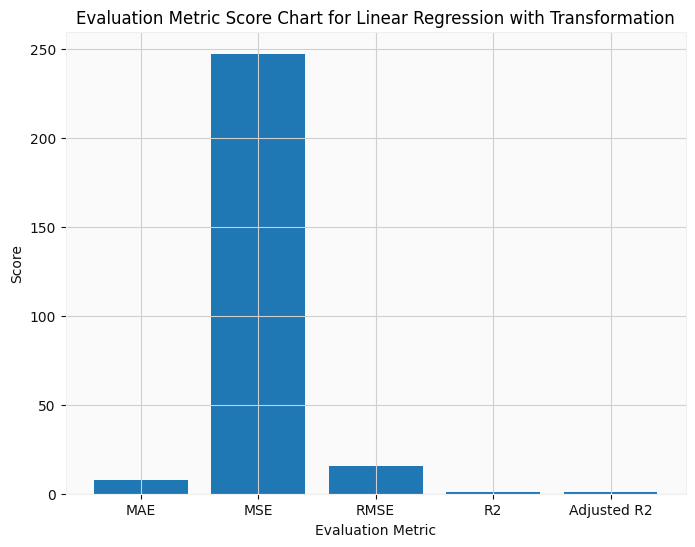

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()

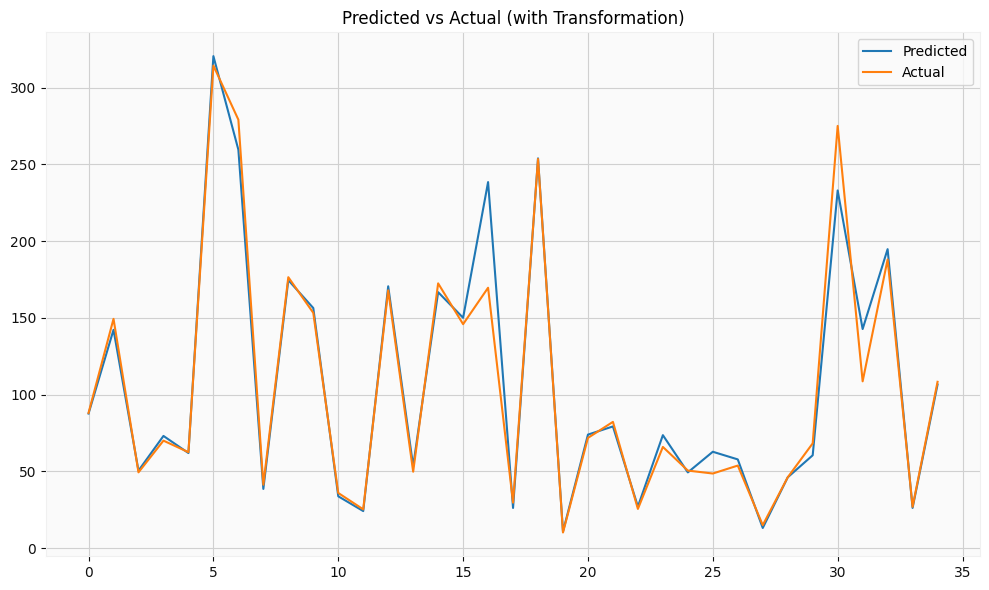

In [ ]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred_with_transformation))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

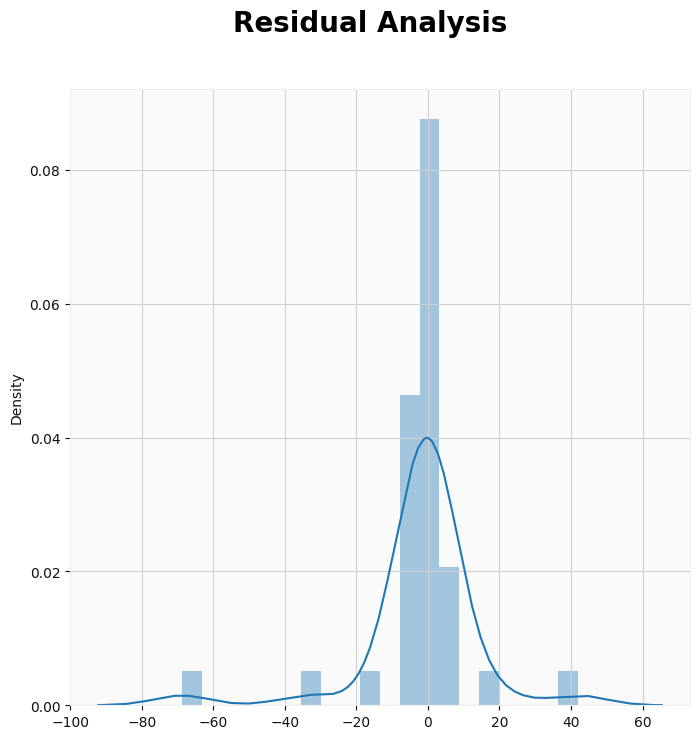

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_with_transformation)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

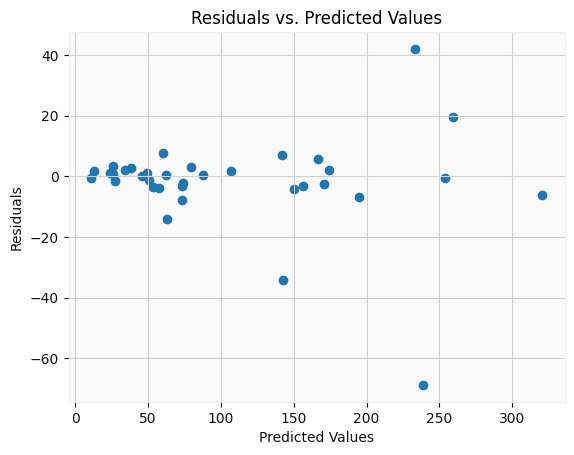

In [ ]:
residuals = 10**(y_test)-10**(y_test_pred_with_transformation)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_with_transformation),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics


,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979670
1,Train Mean squared Error,165.744572
2,Train Root Mean squared Error,12.874182
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.629684
6,Mean squared Error,247.398399
7,Root Mean squared Error,15.728903
8,R2 score,0.962720
9,Adjusted R2 score,0.939641


The Root Mean Squared Error (RMSE) is slightly higher on the test set (15.728903) compared to the training set (12.874182), indicating a slightly larger average magnitude of error in predicting the 'Close' values on the test set.

The R2 Score is slightly lower on the test set (0.962720) compared to the training set (0.984231), suggesting that the model explains a slightly lower proportion of the variance in the 'Close' variable on the test set.

The Adjusted R2 Score is also lower on the test set (0.939641) compared to the training set (0.982578), accounting for the complexity of the model and the number of independent variables.

Overall, the model performs well on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data.

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg_with_transformation,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)



In [ ]:

# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 8.18581124874956
MSE : 222.49884509562526
RMSE : 14.916395177643466
R2 : 0.9788315465020357
Adjusted R2: 0.9766122731514427


Mean Absolute Error : 7.184358051477427
MSE : 128.3864513051523
RMSE : 11.3307745236216
R2 : 0.9806534834664071
Adjusted R2: 0.968677068469421


The MAE and RMSE values for the test set are lower than those for the train set, indicating better performance on the test data.

The R2 score for the test set is slightly higher than that for the train set, suggesting that the model generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating that the model may be overfitting to the training data.

Overall, the model shows good performance on both the train and test sets, with low errors and high R2 scores. However, it is important to monitor the adjusted R2 score and consider potential overfitting when interpreting the results. To overcome that, we can apply regularization techniques.

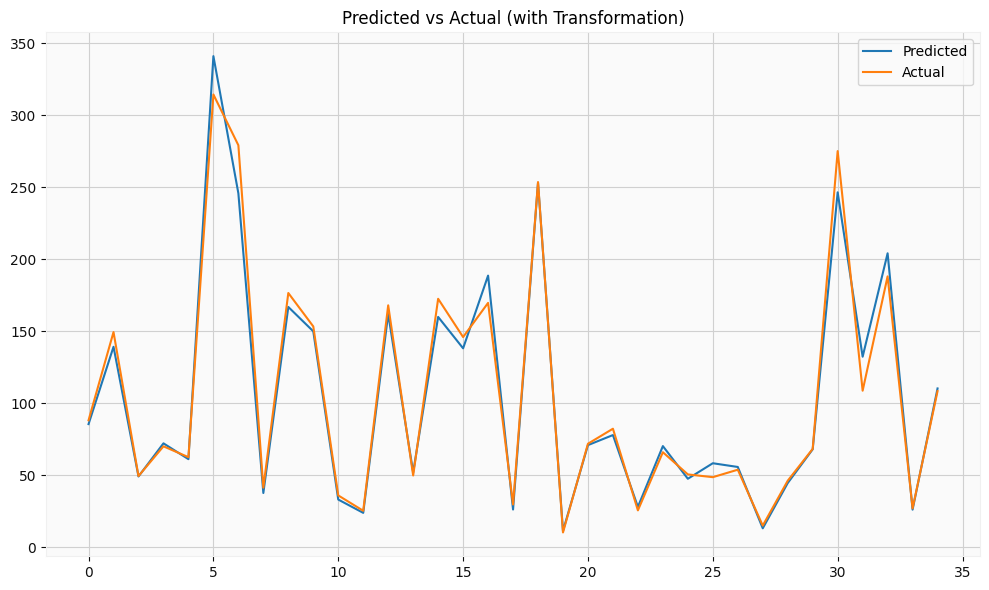

In [ ]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

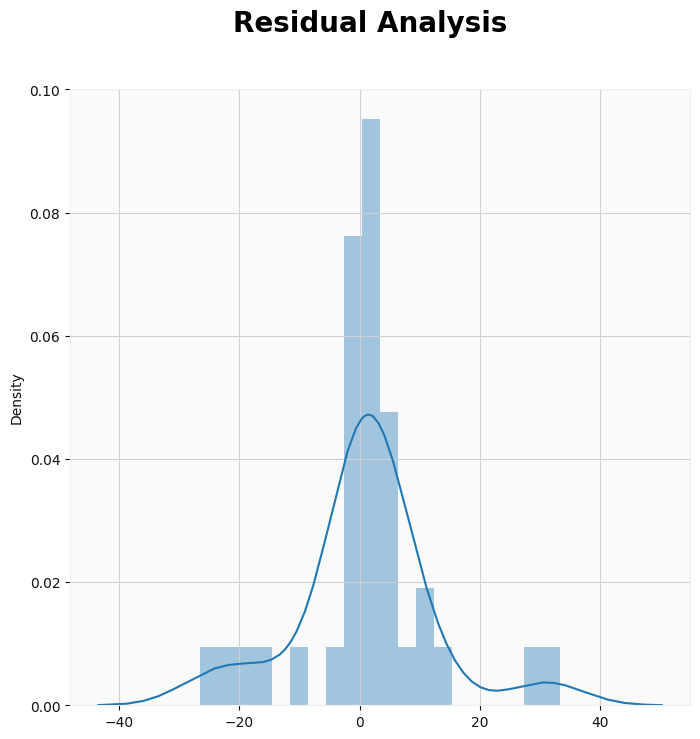

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

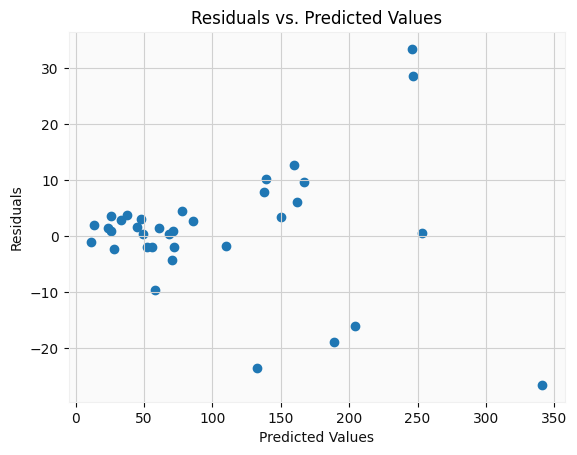

In [ ]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
np.mean(residuals)

0.8712340760106433

All the assumptions of Linear Regression is being taken care. Mean of Residuals is nearly zero, and there is no hetroscadasticity.

In [ ]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs,MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,7.979670,8.185811
1,Train Mean squared Error,165.744572,222.498845
2,Train Root Mean squared Error,12.874182,14.916395
3,Train R2 score,0.984231,0.978832
4,Train Adjusted R2 score,0.982578,0.976612
5,Mean Absolute Error,7.629684,7.184358
6,Mean squared Error,247.398399,128.386451
7,Root Mean squared Error,15.728903,11.330775
8,R2 score,0.962720,0.980653
9,Adjusted R2 score,0.939641,0.968677


Model has improved in terms of predicting the unseen data as the MAE,RMSE are lower than simple regression model and R2 and adjusted R2 has increased after cross validation and hyper parameter tuning. However, seeing the adjustedr2, it is possible that model is overfitting and I will try to regularize with r2 regressor.

### Ridge Regression (L2 Regularization):

Ridge adds a penalty term to the loss function that shrinks the coefficients towards zero without eliminating them completely.

It can be useful when dealing with multicollinearity, as it reduces the impact of highly correlated features.

Ridge is generally more suitable when all the features are expected to contribute to the model and no feature selection is desired.

I am using this because, I do not want to eliminate my features by using L1 or Elasticnet, as I included Lag values to identify the past trends to predict more accurately.

###RIDGE with Cross Validation and Hyper parameter tuning

In [ ]:
#Ridge Regularization
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='r2', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  r2 score is:  0.9760390512790227


In [ ]:
print(ridge_regressor)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')


In [ ]:
best_ridge_model1 = ridge_regressor.best_estimator_

print(best_ridge_model1.coef_)
print(best_ridge_model1.intercept_)

[ 0.39515104 -0.01483846  0.00717508  0.0200902  -0.01428747 -0.00189978
  0.06516592 -0.01046888 -0.05517151  0.03438031  0.04428562 -0.05331164
 -0.02728311]
1.8740878481194465


In [ ]:
y_train_pred_ridge = ridge_regressor.predict(x_train)
y_test_pred_ridge = ridge_regressor.predict(x_test)


In [ ]:
ridge_regressor.score(x_train,y_train)

0.9835228344455276

In [ ]:

# Metric Score for train set
train_MAE_ridge = mean_absolute_error(10**(y_train),(10**y_train_pred_ridge))
print(f"Mean Absolute Error : {train_MAE_ridge}")


train_MSE_ridge  = mean_squared_error(10**(y_train), 10**(y_train_pred_ridge))
print("MSE :" , train_MSE_ridge)

train_RMSE_ridge = np.sqrt(train_MSE_ridge)
print("RMSE :" ,train_RMSE_ridge)

train_r2_ridge = r2_score(10**(y_train), 10**(y_train_pred_ridge))
print("R2 :" ,train_r2_ridge)

train_adjusted_r2_ridge=1-(1-r2_score(10**(y_train), 10**(y_train_pred_ridge)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_ridge)

print('\n')

# Metric Score for test set
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_test_pred_ridge))
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_test_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_test_pred_ridge))
print("R2 :" ,r2_ridge)

adjusted_r2_ridge=1-(1-r2_score(10**(y_test), 10**(y_test_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_ridge)

Mean Absolute Error : 7.822373428096926
MSE : 165.54855820067542
RMSE : 12.866567459920125
R2 : 0.9842497746250328
Adjusted R2: 0.9825985413195927


Mean Absolute Error : 7.051582916386262
MSE : 173.26818724315163
RMSE : 13.163137439195552
R2 : 0.9738902678968994
Adjusted R2: 0.9577271004045037


MAE has been reduced in test dataset which indicates model is predicting good on unseen data. RMSE is also similar in both cases.

In both cases, the R2 values are relatively high, indicating a good fit of the model to the data. The adjusted R2 values are slightly lower, suggesting that the inclusion of additional independent variables may not contribute significantly to the model's predictive power.

Overall, the model shows good performance on both the train and test datasets, with relatively low errors and high R2 values.

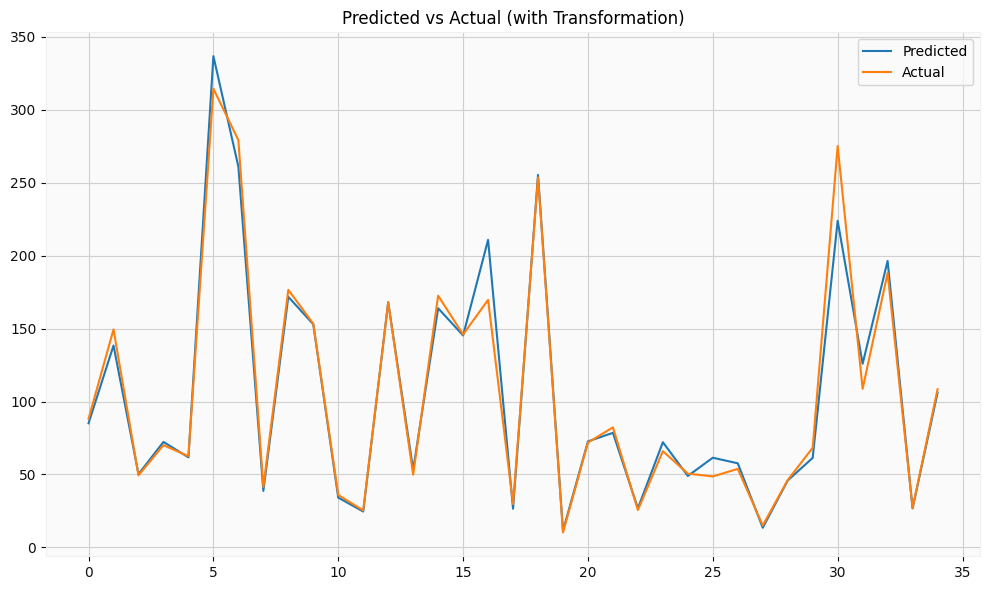

In [ ]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_test_pred_ridge))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

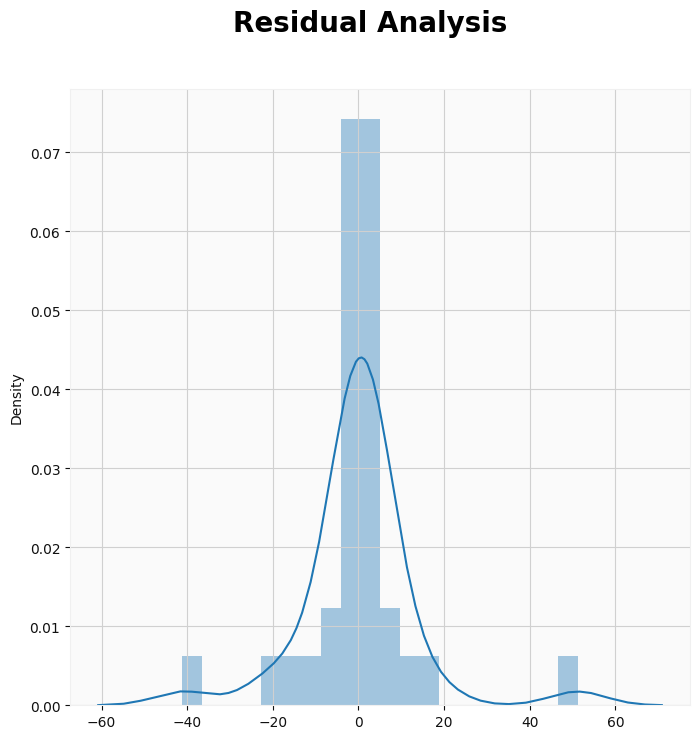

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_ridge)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

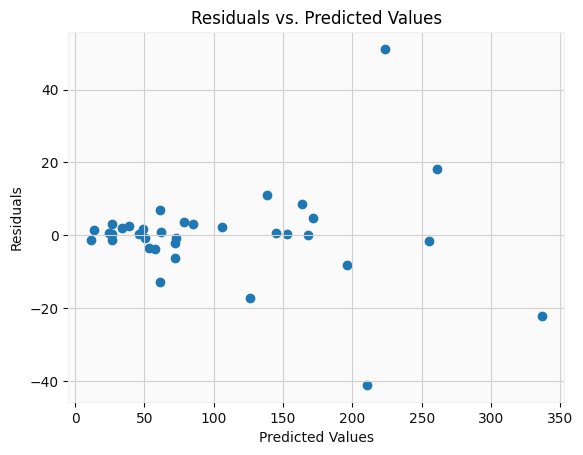

In [ ]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_test_pred_ridge)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_ridge),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
metrics['ridge_regressor'] = [train_MAE_ridge, train_MSE_ridge, train_RMSE_ridge, train_r2_ridge, train_adjusted_r2_ridge,MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adjusted_r2_ridge]


In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor
0,Train Mean Absolute Error,7.979670,8.185811,7.822373
1,Train Mean squared Error,165.744572,222.498845,165.548558
2,Train Root Mean squared Error,12.874182,14.916395,12.866567
3,Train R2 score,0.984231,0.978832,0.984250
4,Train Adjusted R2 score,0.982578,0.976612,0.982599
5,Mean Absolute Error,7.629684,7.184358,7.051583
6,Mean squared Error,247.398399,128.386451,173.268187
7,Root Mean squared Error,15.728903,11.330775,13.163137
8,R2 score,0.962720,0.980653,0.973890
9,Adjusted R2 score,0.939641,0.968677,0.957727


Model has improved compared to previous models, as it is producing leat MAE, and also handling overfitting problem which we faced with second problem. So, I am considering the ridge_regressor as my best model among three.

### ML Model - 2

I am going to implement RandomForest model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.



In [ ]:
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_train_rf =rf.predict(x_train)
y_pred_test_rf =rf.predict(x_test)

In [ ]:
# Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_pred_train_rf))
print(f"Mean Absolute Error : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_pred_train_rf))
print("R2 :" ,train_r2_rf)

train_adjusted_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf)

print('\n')

# Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_pred_test_rf))
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_pred_test_rf))
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)

Mean Absolute Error : 3.7555427738544673
MSE : 34.921138891718975
RMSE : 5.909411044403577
R2 : 0.9966776164415253
Adjusted R2: 0.9963293020362013


Mean Absolute Error : 9.555805076398093
MSE : 284.3146773878396
RMSE : 16.861633295379175
R2 : 0.957156705003449
Adjusted R2: 0.9306346652436792


It can be clearly seen that model is not performed well on unseen data indicating overfitting. Lets overcome that by tuning hyperparameter and using cross validation


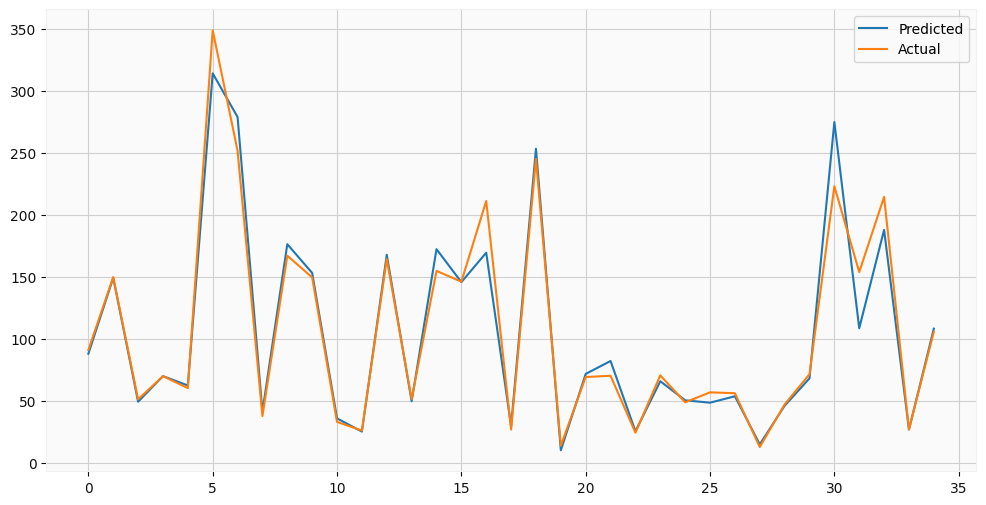

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf)))
plt.legend(["Predicted","Actual"])
plt.show()

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_




Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.3s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.2s
[CV] END max_depth=1, 

In [ ]:
best_model_rf_rs.feature_importances_

array([9.25476795e-01, 6.44461029e-02, 8.41783211e-03, 4.22966778e-04,
       9.31080618e-04, 2.78759445e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.64633309e-05, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=30,
                      n_estimators=200)


In [ ]:
# Predict the model
y_pred_train_rf_rs= random_search.predict(x_train)
y_pred_test_rf_rs= random_search.predict(x_test)

In [ ]:
random_search.score(x_train,y_train)

0.9502768749682969

In [ ]:
# Metric Score for train set
train_MAE_rf_rs = mean_absolute_error(10**(y_train),(10**y_pred_train_rf_rs))
print(f"Mean Absolute Error : {train_MAE_rf_rs}")


train_MSE_rf_rs  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf_rs))
print("MSE :" , train_MSE_rf_rs)

train_RMSE_rf_rs = np.sqrt(train_MSE_rf_rs)
print("RMSE :" ,train_RMSE_rf_rs)

train_r2_rf_rs = r2_score(10**(y_train), 10**(y_pred_train_rf_rs))
print("R2 :" ,train_r2_rf_rs)

train_adjusted_r2_rf_rs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf_rs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf_rs)

print('\n')

# Metric Score for test set
MAE_rf_rs = mean_absolute_error(10**(y_test),(10**y_pred_test_rf_rs))
print(f"Mean Absolute Error : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf_rs))
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(10**(y_test), 10**(y_pred_test_rf_rs))
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf_rs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)

Mean Absolute Error : 16.3191190987673
MSE : 661.2688827730213
RMSE : 25.715148896574977
R2 : 0.9370871359416927
Adjusted R2: 0.9304914324517088


Mean Absolute Error : 16.147765537902835
MSE : 545.1934377162906
RMSE : 23.349377672997853
R2 : 0.9178449614460114
Adjusted R2: 0.8669870804363993


The model has improved than the simple random forest model. it has low adjusted r2 value in test data saying that some additional features are not contributing to the output of y variable.

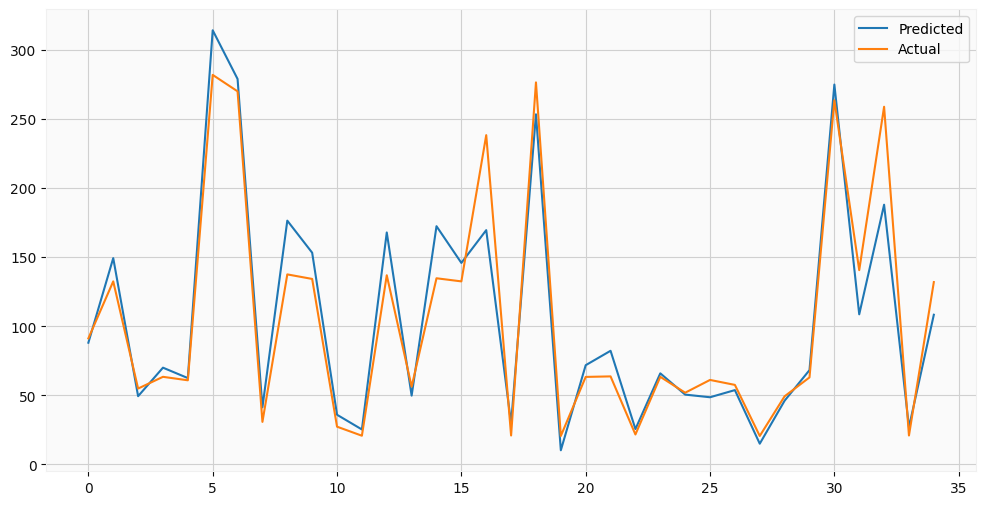

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf_rs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
metrics['random_search'] = [train_MAE_rf_rs, train_MSE_rf_rs, train_RMSE_rf_rs, train_r2_rf_rs, train_adjusted_r2_rf_rs,MAE_rf_rs,MSE_rf_rs,RMSE_rf_rs,r2_rf_rs,adjusted_r2_rf_rs]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search
0,Train Mean Absolute Error,7.979670,8.185811,7.822373,16.319119
1,Train Mean squared Error,165.744572,222.498845,165.548558,661.268883
2,Train Root Mean squared Error,12.874182,14.916395,12.866567,25.715149
3,Train R2 score,0.984231,0.978832,0.984250,0.937087
4,Train Adjusted R2 score,0.982578,0.976612,0.982599,0.930491
5,Mean Absolute Error,7.629684,7.184358,7.051583,16.147766
6,Mean squared Error,247.398399,128.386451,173.268187,545.193438
7,Root Mean squared Error,15.728903,11.330775,13.163137,23.349378
8,R2 score,0.962720,0.980653,0.973890,0.917845
9,Adjusted R2 score,0.939641,0.968677,0.957727,0.866987


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using Cross validation and hyper parameter tuning, the model has improved by overcoming overfitting problem.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R2 score:

A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making.

Adjusted R2 score:

In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

Mean absolute error (MAE):

The MAE is a measure of the average absolute error of the model's predictions.

In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

Root mean squared error (RMSE):

The RMSE is a measure of the average squared error of the model's predictions.

In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

### ML Model - 3

###XGBoost model.

It is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions.

The XGBRegressor class allows us to train a regression model using the XGBoost algorithm which is then used to make predictions on new data.

The model is trained by fitting a sequence of decision trees to the training data, with each new tree trying to correct the errors of the previous trees.

The final model is a weighted sum of these individual trees.

In [ ]:
# ML Model - 3 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(x_train,y_train)

# Predict on the model
y_pred_train_xg =xgboost.predict(x_train)
y_pred_test_xg =xgboost.predict(x_test)


In [ ]:
# Metric Score for train set
train_MAE_xg = mean_absolute_error(10**(y_train),(10**y_pred_train_xg))
print(f"Mean Absolute Error : {train_MAE_xg}")


train_MSE_xg  = mean_squared_error(10**(y_train), 10**(y_pred_train_xg))
print("MSE :" , train_MSE_xg)

train_RMSE_xg = np.sqrt(train_MSE_xg)
print("RMSE :" ,train_RMSE_xg)

train_r2_xg = r2_score(10**(y_train), 10**(y_pred_train_xg))
print("R2 :" ,train_r2_xg)

train_adjusted_r2_xg=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xg)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xg)

print('\n')

# Metric Score for test set
MAE_xg = mean_absolute_error(10**(y_test),(10**y_pred_test_xg))
print(f"Mean Absolute Error : {MAE_xg}")

MSE_xg  = mean_squared_error(10**(y_test), 10**(y_pred_test_xg))
print("MSE :" , MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE :" ,RMSE_xg)

r2_xg = r2_score(10**(y_test), 10**(y_pred_test_xg))
print("R2 :" ,r2_xg)

adjusted_r2_xg=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xg)

Mean Absolute Error : 0.15164743147034992
MSE : 0.08484693805475113
RMSE : 0.29128497739284653
R2 : 0.9999919276953465
Adjusted R2: 0.9999910814053425


Mean Absolute Error : 11.034003852844233
MSE : 286.2860672939444
RMSE : 16.91999016825791
R2 : 0.9568596368391302
Adjusted R2: 0.9301536977395441


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Converting into readable format
EM=['MAE','MSE','RMSE','r2','adjusted_r2']
train_xg=[train_MAE_xg,train_MSE_xg,train_RMSE_xg,train_r2_xg,train_adjusted_r2_xg]
test_xg=[MAE_xg,MSE_xg,RMSE_xg,r2_xg,adjusted_r2_xg]

#final dataframe of parameters
data_xg=pd.DataFrame({'Evalution Parameters': EM, 'Train':train_xg, 'Test':test_xg}).set_index('Evalution Parameters')
data_xg


,Train,Test
Evalution Parameters,,
MAE,0.151647,11.034004
MSE,0.084847,286.286067
RMSE,0.291285,16.919990
r2,0.999992,0.956860
adjusted_r2,0.999991,0.930154


It is completely learning the data including noise, that is why it is not performing well on test data. overfitting the train dataset.

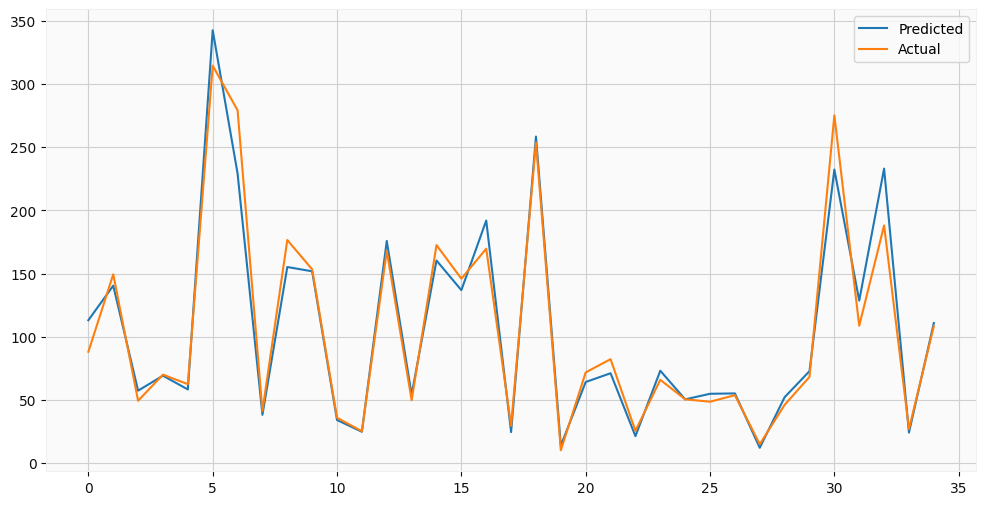

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((10**y_pred_test_xg))
plt.plot(np.array((10**y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Define the parameter grid for hyperparameter tuning
param_grid_xg = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [2,4,6,8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]


}



# Create the GridSearchCV object
xgb_gs = GridSearchCV(estimator=xgboost, param_grid=param_grid_xg, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
xgb_gs.fit(x_train, y_train)

# Get the best estimator
best_model_xgb_gs = xgb_gs.best_estimator_



# Predict on the model
y_pred_train_xgb_gs= xgb_gs.predict(x_train)
y_pred_test_xgb_gs= xgb_gs.predict(x_test)

In [ ]:
best_model_xgb_gs.feature_importances_

array([8.61247301e-01, 1.09582245e-01, 5.24532469e-03, 0.00000000e+00,
       2.92274659e-03, 4.91890078e-03, 2.61928304e-03, 3.04744486e-03,
       3.87621298e-03, 2.16099015e-03, 4.80066316e-04, 1.92599022e-03,
       1.97362970e-03], dtype=float32)

In [ ]:
print(best_model_xgb_gs)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
xgb_gs.score(x_train,y_train)

0.9840923436047051

In [ ]:
# Metric Score for train set
train_MAE_xgb_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_xgb_gs))
print(f"Mean Absolute Error : {train_MAE_xgb_gs}")


train_MSE_xgb_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_xgb_gs))
print("MSE :" , train_MSE_xgb_gs)

train_RMSE_xgb_gs = np.sqrt(train_MSE_xgb_gs)
print("RMSE :" ,train_RMSE_xgb_gs)

train_r2_xgb_gs = r2_score(10**(y_train), 10**(y_pred_train_xgb_gs))
print("R2 :" ,train_r2_xgb_gs)

train_adjusted_r2_xgb_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xgb_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xgb_gs)

print('\n')

# Metric Score for test set
MAE_xgb_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_xgb_gs))
print(f"Mean Absolute Error : {MAE_xgb_gs}")

MSE_xgb_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_xgb_gs))
print("MSE :" , MSE_xgb_gs)

RMSE_xgb_gs = np.sqrt(MSE_xgb_gs)
print("RMSE :" ,RMSE_xgb_gs)

r2_xgb_gs = r2_score(10**(y_test), 10**(y_pred_test_xgb_gs))
print("R2 :" ,r2_xgb_gs)

adjusted_r2_xgb_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xgb_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xgb_gs)

Mean Absolute Error : 10.366378584046293
MSE : 369.76940521924024
RMSE : 19.22938910156119
R2 : 0.9648202827480327
Adjusted R2: 0.96113208658452


Mean Absolute Error : 7.883140341622485
MSE : 145.45141668555263
RMSE : 12.060324070502942
R2 : 0.978081968859368
Adjusted R2: 0.9645136638675482


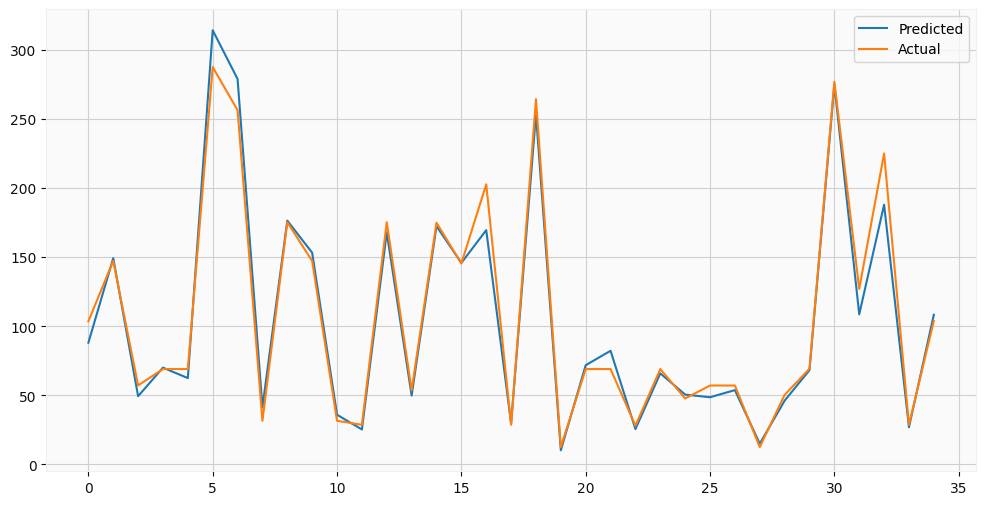

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_xgb_gs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
metrics['xgb_gs'] = [train_MAE_xgb_gs, train_MSE_xgb_gs, train_RMSE_xgb_gs, train_r2_xgb_gs, train_adjusted_r2_xgb_gs,MAE_xgb_gs,MSE_xgb_gs,RMSE_xgb_gs,r2_xgb_gs,adjusted_r2_xgb_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search,xgb_gs
0,Train Mean Absolute Error,7.979670,8.185811,7.822373,16.319119,10.366379
1,Train Mean squared Error,165.744572,222.498845,165.548558,661.268883,369.769405
2,Train Root Mean squared Error,12.874182,14.916395,12.866567,25.715149,19.229389
3,Train R2 score,0.984231,0.978832,0.984250,0.937087,0.964820
4,Train Adjusted R2 score,0.982578,0.976612,0.982599,0.930491,0.961132
5,Mean Absolute Error,7.629684,7.184358,7.051583,16.147766,7.883140
6,Mean squared Error,247.398399,128.386451,173.268187,545.193438,145.451417
7,Root Mean squared Error,15.728903,11.330775,13.163137,23.349378,12.060324
8,R2 score,0.962720,0.980653,0.973890,0.917845,0.978082
9,Adjusted R2 score,0.939641,0.968677,0.957727,0.866987,0.964514


The model has improved a lot after tuning the hyperparameters

In [ ]:
print(best_model_xgb_gs.feature_importances_)


[8.61247301e-01 1.09582245e-01 5.24532469e-03 0.00000000e+00
 2.92274659e-03 4.91890078e-03 2.61928304e-03 3.04744486e-03
 3.87621298e-03 2.16099015e-03 4.80066316e-04 1.92599022e-03
 1.97362970e-03]


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered R2. adjusted R2 and RMSE as evaluation metrics.

R2 score is a measure of how well the model fits the data.

It ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

The adjusted R-squared provides a penalized measure of model fit that takes into account both the explanatory power of the model and the complexity of the model. It is particularly useful when comparing models with different numbers of predictors. A higher adjusted R-squared indicates a better fit of the model, as it reflects the proportion of variance in the dependent variable that is explained by the independent variables, adjusted for the model complexity.

RMSE is a measure of the average squared error of the model's predictions.

It is calculated as the square root of the mean squared error (MSE).

In a business context, a low RMSE can indicate that the model is making relatively small errors.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I am considering XGBRegressor(xgb_gs) as my final model.

This model has the highest R2 and adjusted r2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable and also considering all the features. Ridge also performed well. but has low adjusted r2 in test data than in the train data. It indicates, that all the feautures are not necessary for ridge to predict the closing price, but I deliberately added lag values which captures previous data and pattern.

XGboost capturing all features and still predicting better than ridge. It even has low RMSE among all the three models and also performed well on test data than on the train data.



###Hypothesis Testing on overall Performance

Null Hypothesis: The XGBoost model does not have significant predictive power.

Alternative Hypothesis: The XGBoost model has significant predictive power.

In [ ]:
import numpy as np
from scipy.stats import f

# Obtain the predicted values from the XGBoost model
y_pred_hypo = xgb_gs.predict(x_test)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((y_test - y_pred_hypo) ** 2)

# Calculate the total sum of squares (TSS)
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the degrees of freedom
n = len(y_test)
k = x_test.shape[1]
df_model = k - 1
df_residual = n - k

# Calculate the F-statistic
F = ((TSS - RSS) / df_model) / (RSS / df_residual)

# Calculate the p-value
p_value = 1 - f.cdf(F, df_model, df_residual)

# Define the significance level (alpha)
alpha = 0.05

# Perform the hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. The model has significant predictive power.")
else:
    print("Fail to reject the null hypothesis. The model does not have significant predictive power.")


Reject the null hypothesis. The model has significant predictive power.


 I compared the F-statistic to the critical value from the F-distribution to determine whether to reject the null hypothesis. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis and conclude that the model has significant predictive power. Otherwise, if the p-value is greater than or equal to alpha, we fail to reject the null hypothesis and conclude that the model does not have significant predictive power.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I will be using XGBoost model and for model explainability I am using SHAP (SHapley Additive exPlanations) value.

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

I am using TreeExplainer to explain my XGBoost Regressor(xgb_gs)

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.1 MB/s eta 0:00:00


In [ ]:
import shap

explainer = shap.TreeExplainer(best_model_xgb_gs)

# Generate SHAP values for the entire training dataset
shap_values = explainer(x_test)

# Select a specific record for explanation (e.g., the first record in x_test)


# Explain the prediction for the selected record
shap.initjs()
shap.force_plot(shap_values[0], feature_names=x_independ.columns)

In [ ]:
x_test[0]

array([ 0.14729879, -0.4443443 , -0.51789102, -0.41933087, -0.36156657,
       -0.40554171, -0.4904546 , -0.54869648, -0.5338897 , -0.28327194,
       -0.15139856, -0.08698624, -0.20731774])

The base value: The original paper explains that the base value is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean.

Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

OHL: has a negative impact on the target variable.It has lower value than the average OHL value So it pushes the prediction to the right.

lag_2 has a positive impact on the target variable. A higher than the average lag_2 value drives the prediction to the left.

lag_4: is positively related to the target variable. A higher than the average lag_4 value pushes the prediction to the left.

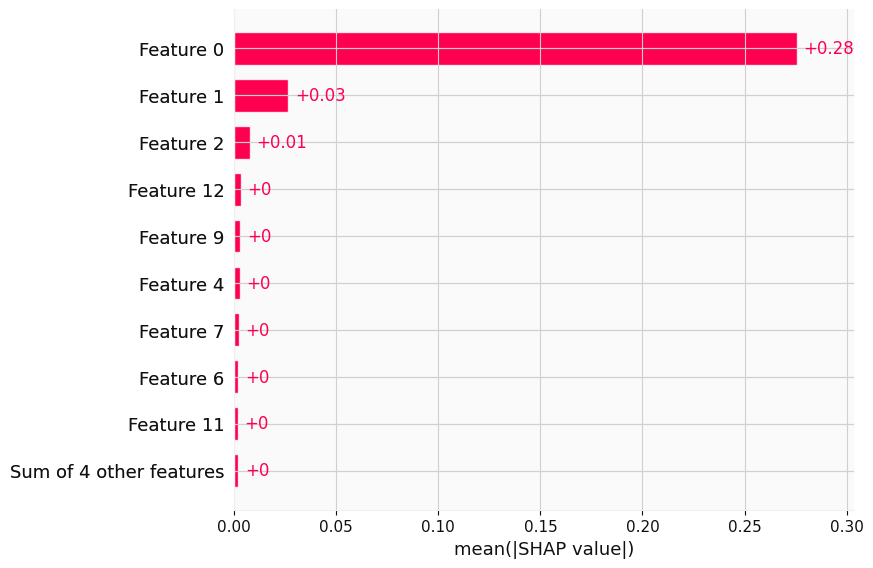

In [ ]:
shap.plots.bar(shap_values)

I plotted mean SHAP plot in which for each feature, we calculate the mean of the absolute SHAP values across all observations.

There is one bar for each feature.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions.

This plot can be used as a feature importance plot to highlight features that are important to a model’s predictions.

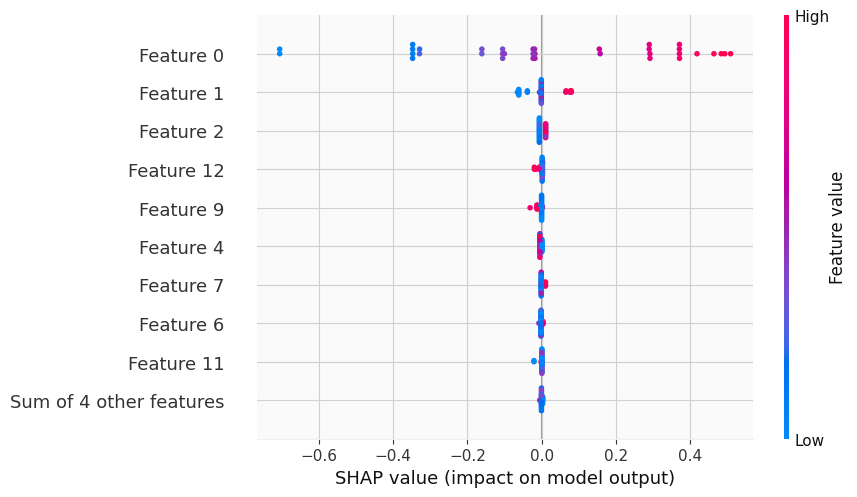

In [ ]:

shap.plots.beeswarm(shap_values)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/yesbank_stock_mlpredictor.pkl'
pickle.dump(xgb_gs, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/yesbank_stock_mlpredictor.pkl'
yesbank_ml_model = pickle.load(open(filename, 'rb'))

In [ ]:
abc=yesbank_ml_model.predict(x_test)
r2_score(y_test,abc)



0.9824008697897321

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The main goal of the project is to create a machine learning model which can predict the closing price of Yes Bank stock for that month, keeping in mind of the fraud case happened in 2018.

I have developed 3 models Ridge_Regression, Random forest and XGBoost Regressor.
XGBRegressor model shows promising result with R2 score of 0.97 both on train and test dataset, therefore it can be used to solve this problem. It also considering all newlt added features and taking care of multicollinearity.

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.

I considered to take mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns, which can also can take care of fraud case by studying the pattern.

The important feautures which plays a crucial role in deciding closing price are {'OHL', 'lag1', 'lag2', 'lag12','lag9 ', 'lag4', 'lag6', 'lag11'}


The dataset has only monthly related price, a daily level price would be more accurate as model can analyze important patterns like week opening price and weekend price. Volume of the data if provided can also be useful in making prediction. A stock prediction involved many aspects like holidays, political decisions, events, un precedented disasters, human decisions. This can be better predicted by having all these features and using time series models like ARIMA and LSTM can ve predicted more accurately.

Given the dataset and features, Our model is performing well on all data-points.
With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***